<a href="https://colab.research.google.com/github/koci1005/c-programming/blob/main/Health%20Care%20Cost%20Regression%20%26%20Exploratory%20Data%20Analysis%20by%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The key difference between regression and classification lies in the type of output they predict: regression predicts continuous values (like price or temperature), while classification predicts discrete categories or labels (like "Disease" or "not Disease")

# Step 1: Import Librariesv

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

# Step 2: Generate Sample Data for Linear Regression

In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

In [ ]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [ ]:
y

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7


# Step 3: Feature Selection - Correlation

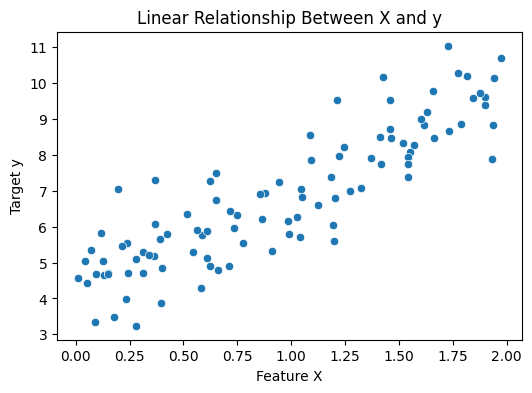

In [ ]:

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.flatten(), y=y.flatten())
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Relationship Between X and y")
plt.show()


# Step 4: Building an ANN Model for Linear Regression

In [ ]:
model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')  # Single perceptron
])

model.compile(optimizer='sgd', loss='mse')
model.fit(X, y, epochs=200, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 5: Evaluate the Model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


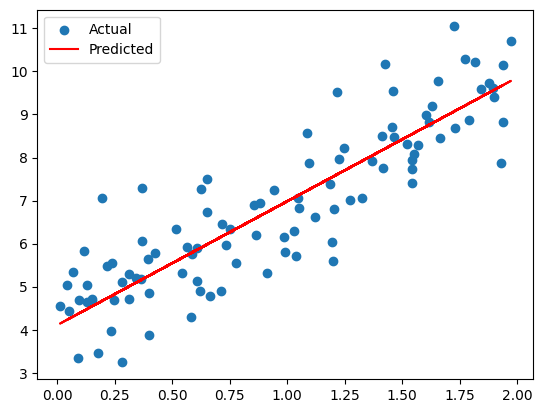

In [ ]:
predictions = model.predict(X)
plt.scatter(X, y, label="Actual")
plt.plot(X, predictions, color='red', label="Predicted")
plt.legend()
plt.show()


# Step 6: Multiple Linear Regression with ANN

In [ ]:

X_multi = np.random.rand(100, 3)
y_multi = 3 + 2 * X_multi[:, 0] + 5 * X_multi[:, 1] + np.random.randn(100)  # y = 3 + 2X1 + 5X2 + noise


In [ ]:
X_multi

array([[0.7948113 , 0.50263709, 0.57690388],
       [0.49251769, 0.19524299, 0.72245212],
       [0.28077236, 0.02431597, 0.6454723 ],
       [0.17711068, 0.94045858, 0.95392858],
       [0.91486439, 0.3701587 , 0.01545662],
       [0.92831856, 0.42818415, 0.96665482],
       [0.96361998, 0.85300946, 0.29444889],
       [0.38509773, 0.85113667, 0.31692201],
       [0.16949275, 0.55680126, 0.93615477],
       [0.6960298 , 0.57006117, 0.09717649],
       [0.61500723, 0.99005385, 0.14008402],
       [0.51832965, 0.87737307, 0.74076862],
       [0.69701574, 0.70248408, 0.35949115],
       [0.29359184, 0.80936116, 0.81011339],
       [0.86707232, 0.91324055, 0.5113424 ],
       [0.50151629, 0.79829518, 0.64996393],
       [0.70196688, 0.79579267, 0.89000534],
       [0.33799516, 0.37558295, 0.09398194],
       [0.57828014, 0.03594227, 0.46559802],
       [0.54264463, 0.28654125, 0.59083326],
       [0.03050025, 0.03734819, 0.82260056],
       [0.36019064, 0.12706051, 0.52224326],
       [0.

In [ ]:
y_multi

array([ 7.10805177,  5.00823092,  3.23305909,  8.67936421,  5.61290185,
        6.85517838,  9.31258286,  8.54031765,  6.83460668,  6.11772335,
        7.64616953,  9.70120149,  8.23876591,  6.88550293, 10.85149938,
        8.11018312,  9.56219429,  5.62142356,  6.39701958,  7.27333637,
        2.9987773 ,  5.3272548 ,  6.26446819,  4.79773509,  6.30349629,
        8.21925736,  7.00295813,  1.52492699,  6.96857276,  2.08954168,
        7.40202611,  9.05173645,  8.66966889,  5.34942015,  5.23776573,
        5.97865907,  2.73413602,  4.75740519,  7.26032541,  4.93097634,
        6.22127962,  3.58959255,  4.67743103,  6.76147054,  7.01118797,
        7.63827831,  3.22452186,  2.44944493,  4.67457635,  8.0740286 ,
        5.73428944,  8.93434576,  3.92100925,  8.77332236,  7.51907062,
        8.11833609,  7.7208072 ,  6.13348978, 10.08244048,  7.58384874,
        7.6892116 ,  7.52004175,  5.11741622,  8.24167468,  6.26868043,
        7.06421798,  3.75666396,  7.03829334,  6.39800757,  5.87

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multi_model = Sequential([
    Dense(3, input_shape=(3,), activation='linear'),
    Dense(1, activation='linear')
])

multi_model.compile(optimizer='adam', loss='mse')
multi_model.fit(X_train_scaled, y_train, epochs=200, verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


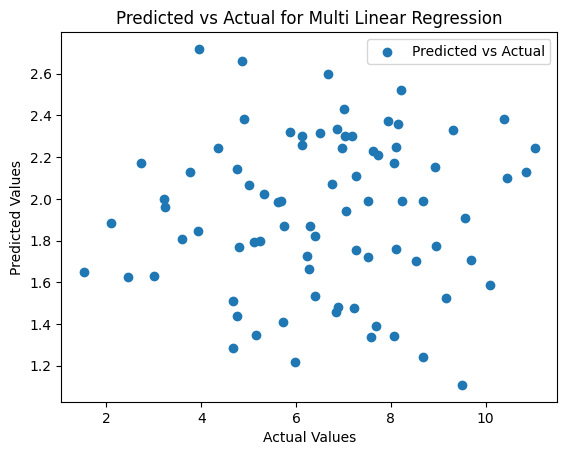

In [ ]:
# Step 7: Evaluate the Multi Linear Regression Model
predictions = multi_model.predict(X_train)
plt.scatter(y_train, predictions, label="Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual for Multi Linear Regression")

plt.legend()
plt.show()

# Step 7: Evaluate the Multi Linear Regression Model

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


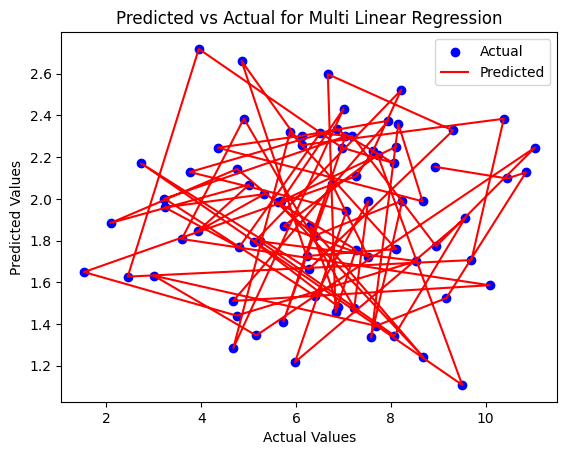

In [ ]:
predictions = multi_model.predict(X_train)
plt.scatter(y_train, predictions, label="Actual", color='blue') # Color actual values blue
plt.plot(y_train, predictions, color='red', label="Predicted") # Plot predicted as a line in red
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual for Multi Linear Regression")
plt.legend()
plt.show()



# Logistic Regression with ANN

In [ ]:
np.random.seed(42)
X_class = np.random.randn(200, 2)
y_class = (X_class[:, 0] + X_class[:, 1] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

log_model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),
    Dense(1, activation='sigmoid')
])

log_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log_model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate Logistic Regression Model

In [ ]:
y_pred = (log_model.predict(X_test) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Accuracy: 0.575
Confusion Matrix:
 [[11 10]
 [ 7 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56        21
           1       0.55      0.63      0.59        19

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.58      0.57      0.57        40



In [ ]:
# Dense Neural Network
from tensorflow.keras.layers import Dense
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Wrangling

In [ ]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Pre-Processing : Label Encoder

In [ ]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# It will map 0 -> female , 1 => male
# fit() : Training
le.fit(insurance_data['sex'])

LabelEncoder()

In [ ]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
le.fit(insurance_data['smoker'])

LabelEncoder()

In [ ]:
insurance_data['smoker'] = le.transform(insurance_data['smoker'])

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
le.fit(insurance_data['region'])
insurance_data['region'] = le.transform(insurance_data['region'])

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# EDA (Exploratory Data Analysis)

<ipython-input-36-158321343a5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'smoker', kind = 'count', data = insurance_data, palette = 'Set1')


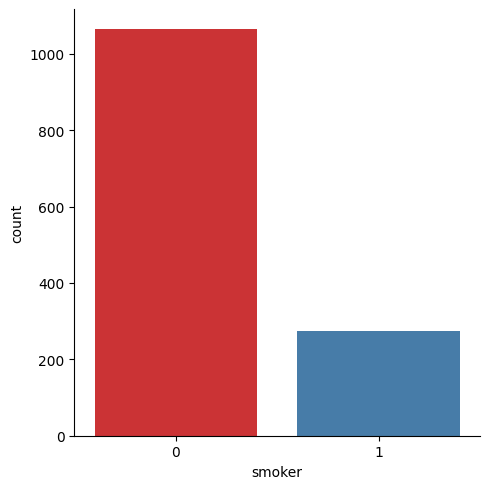

In [ ]:
sns.catplot(x = 'smoker', kind = 'count', data = insurance_data, palette = 'Set1')

In [ ]:
insurance_data['smoker'].value_counts()

,count
smoker,
0,1064
1,274


In [ ]:
insurance_data['smoker'].value_counts()/insurance_data.shape[0]

,count
smoker,
0,0.795217
1,0.204783


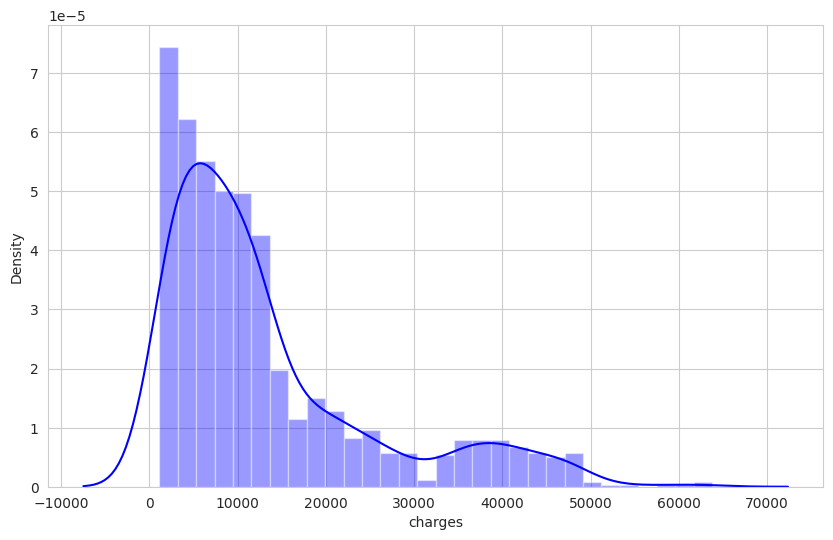

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
# This is positively skewed distribution
sns.distplot(insurance_data['charges'], color = 'b')
plt.show()

## Box-Whisker PLot
This plot is useful for finding ditribution & outliers present in data.

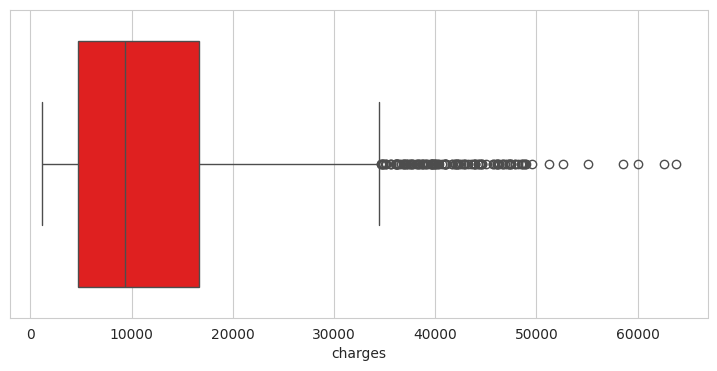

In [ ]:
plt.figure(figsize = (9,4))
# This is positively skewed distribution
sns.boxplot(insurance_data['charges'], color = 'red', orient = 'h')
plt.show()

# Handling Outliers

In [ ]:
from scipy import stats
stats.zscore(insurance_data['charges'])

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802
...,...
1333,-0.220551
1334,-0.914002
1335,-0.961596
1336,-0.930362


In [ ]:

np.abs(stats.zscore(insurance_data['charges']))

,charges
0,0.298584
1,0.953689
2,0.728675
3,0.719843
4,0.776802
...,...
1333,0.220551
1334,0.914002
1335,0.961596
1336,0.930362


In [ ]:
len(np.abs(stats.zscore(insurance_data['charges']))>3)

1338

In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
insurance_data[np.abs(stats.zscore(insurance_data['charges'])) > 3]

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
543,54,0,47.410,0,1,2,63770.42801
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
1146,60,1,32.800,0,1,3,52590.82939
1230,52,1,34.485,3,1,1,60021.39897
1300,45,1,30.360,0,1,2,62592.87309


In [ ]:
insurance_data[np.abs(stats.zscore(insurance_data['charges'])) > 3].index

Index([34, 543, 577, 819, 1146, 1230, 1300], dtype='int64')

In [ ]:
insurance_data.drop([34, 543, 577, 819, 1146, 1230, 1300], inplace = True)

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Correlation
Feature Selections

#### Correlation represents relation b/w two numerical columns. Range will +1 to -1
#### If correlation b/w two numerical columns is closer +1 or -1 it will considered as highly correlated
#### If correlation b/w two numerical columns is closer 0 then, it will considered as weakly correlated

In [ ]:
insurance_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.022425,0.108331,0.043197,-0.028377,0.000527,0.304561
sex,-0.022425,1.000000,0.048915,0.016042,0.075786,0.001571,0.057519
bmi,0.108331,0.048915,1.000000,0.014860,-0.006159,0.158158,0.187061
children,0.043197,0.016042,0.014860,1.000000,0.011084,0.018396,0.076993
smoker,-0.028377,0.075786,-0.006159,0.011084,1.000000,-0.004096,0.785617
region,0.000527,0.001571,0.158158,0.018396,-0.004096,1.000000,-0.009306
charges,0.304561,0.057519,0.187061,0.076993,0.785617,-0.009306,1.000000


<Axes: >

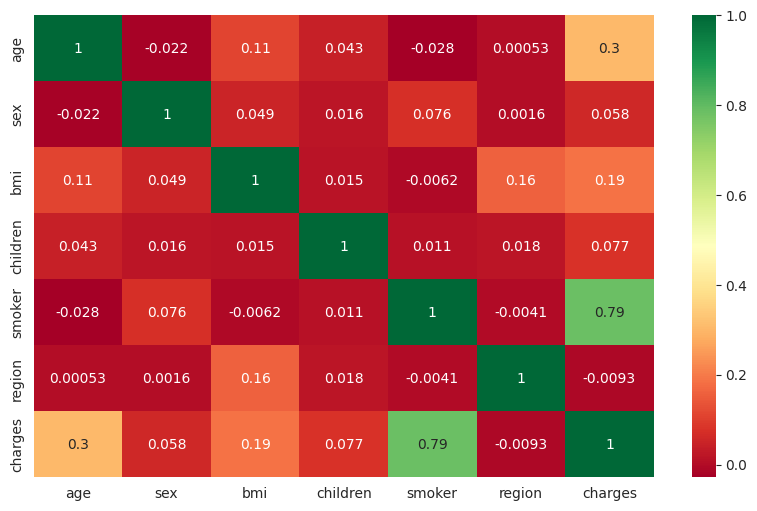

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(insurance_data.corr(),annot=True,cmap='RdYlGn')

# Split Data into Features & Labels

In [ ]:
X = insurance_data.drop('charges', axis = 1)
Y = insurance_data['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


#### Splitting Data into Train & Test samples

In [ ]:
from sklearn.model_selection import train_test_split
# spliting of training & test is 80% to 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## ANN Regression

In [ ]:
def build_model():
    # Sequential Neural Network - Feedforward Neural Network
    model = Sequential()
    # Units = Number of Neurons(2 * pow(n)) , Input Shape = Num of Features
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - For Regression
    model.add(Dense(units = 1))
    # Optimizers (alpha)
    optimizers = RMSprop(learning_rate = 0.001)
    # Model Compiler
    # Error Function for Regression = 'MSE'
    # Metrics = Metrics of Model / Check the performance of model
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error',
                                                                                 'mean_absolute_error'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,017 (648.50 KB)

 Trainable params: 166,017 (648.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# epochs = Num of Iterations, batch_size = sample size per iteration, validation split = 20% (test size)
# validation is done while training of model
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 298633440.0000 - mean_absolute_error: 12489.0273 - mean_squared_error: 298633440.0000 - val_loss: 154006992.0000 - val_mean_absolute_error: 7502.9233 - val_mean_squared_error: 154006992.0000
Epoch 2/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 163521248.0000 - mean_absolute_error: 8000.8022 - mean_squared_error: 163521248.0000 - val_loss: 99890632.0000 - val_mean_absolute_error: 8107.0620 - val_mean_squared_error: 99890632.0000
Epoch 3/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 126259760.0000 - mean_absolute_error: 9079.0771 - mean_squared_error: 126259760.0000 - val_loss: 101309784.0000 - val_mean_absolute_error: 8437.1348 - val_mean_squared_error: 101309784.0000
Epoch 4/600
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 127181984.0000 - mean_absolute_error: 9109.0625 - mean_squared_error: 127181984.0000 - val_loss: 106502400.0000 - val_mean_absolute_error: 9079.7842 - val_mean_squared_error: 106502400.0000
E

In [ ]:
pd.DataFrame(history.history)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,277809792.0,11816.131836,277809792.0,154006992.0,7502.923340,154006992.0
1,148645936.0,8179.398926,148645936.0,99890632.0,8107.062012,99890632.0
2,126368640.0,9008.330078,126368640.0,101309784.0,8437.134766,101309784.0
3,126196288.0,9045.986328,126196288.0,106502400.0,9079.784180,106502400.0
4,126749576.0,9184.351562,126749576.0,98928360.0,8027.497070,98928360.0
...,...,...,...,...,...,...
595,19882672.0,2633.790039,19882672.0,25813578.0,2974.622559,25813578.0
596,19526658.0,2585.625977,19526658.0,22410536.0,2143.318848,22410536.0
597,20145426.0,2628.313477,20145426.0,22444398.0,2195.948242,22444398.0
598,19456180.0,2568.541748,19456180.0,24084574.0,2390.163818,24084574.0


<Axes: >

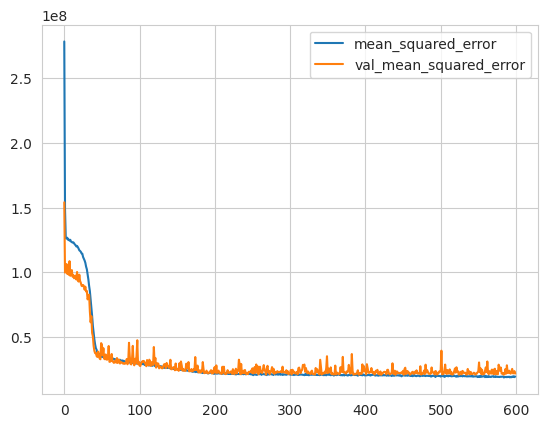

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()
# Both lines are away from each other that means Models is getting overfitted
# That decrease your Number of epochs
#But in this case lines are closer to each other so epoch can be greater

<Axes: >

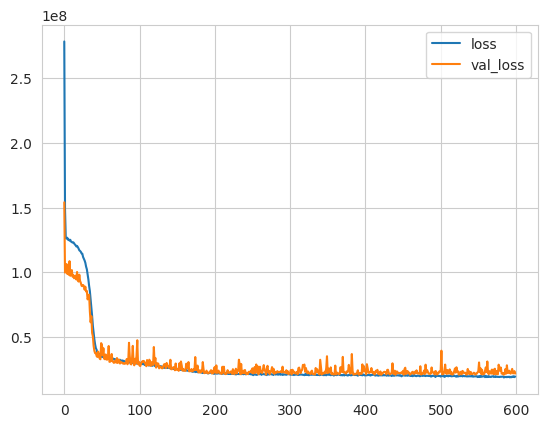

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

# Predictions

In [ ]:
# Yhat
predictions = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
from sklearn.metrics import r2_score
# R-squred : metric of regression model (0-1)-- closer to +1 the better is the performance
r2_score(y_test, predictions)

0.8555644986490155

In [ ]:
pd.DataFrame(predictions)

,0
0,24070.292969
1,12251.628906
2,7574.880371
3,42959.589844
4,5767.584961
...,...
262,3090.620117
263,11551.995117
264,2368.981201
265,6507.597656


In [ ]:
results = pd.DataFrame(predictions, columns = ['Predicted_Insurance'])

In [ ]:
results['Actual_InsuranceCost'] = np.array(y_test)

In [ ]:
results

,Predicted_Insurance,Actual_InsuranceCost
0,24070.292969,21259.37795
1,12251.628906,12730.99960
2,7574.880371,7682.67000
3,42959.589844,44260.74990
4,5767.584961,4889.03680
...,...,...
262,3090.620117,1815.87590
263,11551.995117,11658.11505
264,2368.981201,1639.56310
265,6507.597656,5354.07465


<Axes: >

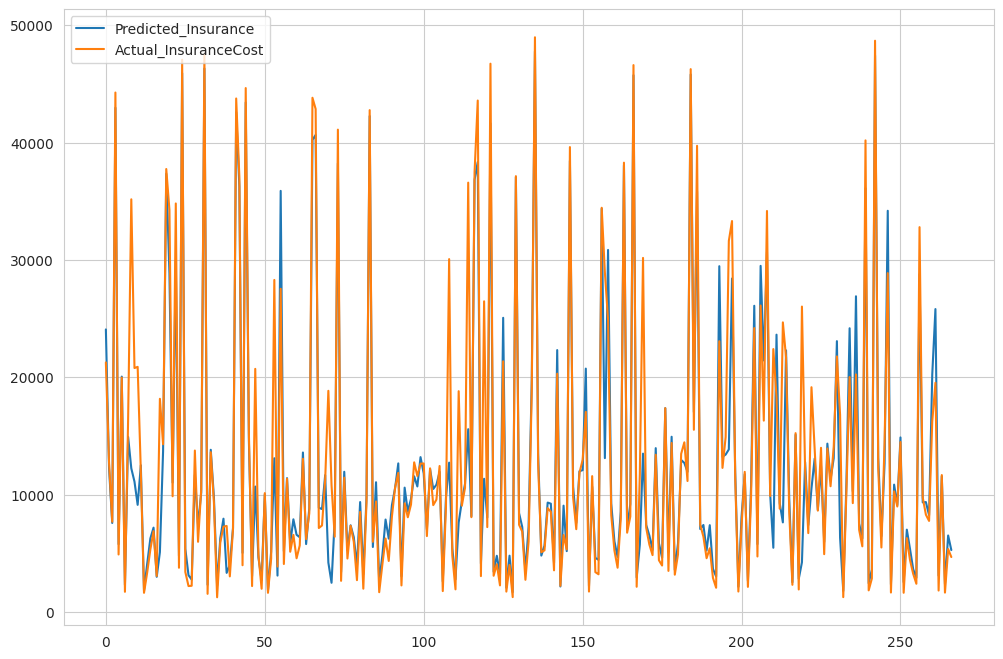

In [ ]:
results.plot(figsize = (12,8))